<a href="https://colab.research.google.com/github/gianna1490/master/blob/main/Deep_Learning_Entry_Task_y0107978.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning entry task
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

## 1. Import all necessary packages

In [ ]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install IPython
#!{sys.executable} -m pip install torch_optimizer
#!{sys.executable} -m pip install res_mlp_pytorch
!{sys.executable} -m pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Load the Fashion MNIST dataset for image classification
Create three disjoint sets: train, validation and test.

In [ ]:
(x_train_set, y_train_set), (x_test_set, y_test_set) = fashion_mnist.load_data()
print("X_train original shape", x_train_set.shape)
print("y_train original shape", y_train_set.shape)

#dictionary with the data classes
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

#converting images in 1D vectors
x_train_set = x_train_set.reshape(x_train_set.shape[0], 784)
print(x_train_set.shape[0])
x_test_set = x_test_set.reshape(x_test_set.shape[0], 784)

x_train_set = x_train_set.astype('float32')
x_test_set = x_test_set.astype('float32')


print("Training matrix shape", x_train_set.shape)
print("Testing matrix shape", x_test_set.shape)

#normalization of the RGB codes by dividing it to the max RGB value.
x_train_set = x_train_set.astype('float32') / 255
x_test_set = x_test_set.astype('float32') / 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes = 10 # There are 10 classes possible 
Y_train= np_utils.to_categorical(y_train_set, num_classes)
Y_test= np_utils.to_categorical(y_test_set, num_classes)



X_train original shape (60000, 28, 28)
y_train original shape (60000,)
60000
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## 3. Create a Multi Layer Perceptron (MLP) for image classification.
Feel free to use any configuration and framework for its implementation (Keras, Tensorflow, Pytorch, etc.)

In [ ]:
# BUILD THE MODEL
model = Sequential()

model.add(Dense(512, input_dim = 28*28))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# compile it - categorical crossentropy is for multiple choice classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. Train the model
During training, perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [ ]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(x_train_set, 
                    Y_train,
                    batch_size=128, 
                    epochs=28,
                    verbose=1,
                    validation_data=(x_test_set, Y_test))

best_score = max(history.history['val_accuracy'])
best_epoch = np.array(history.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Epoch 1/28
469/469 [==============================] - 14s 28ms/step - loss: 0.4782 - accuracy: 0.8285 - val_loss: 0.4097 - val_accuracy: 0.8494
Epoch 2/28
469/469 [==============================] - 13s 28ms/step - loss: 0.3510 - accuracy: 0.8696 - val_loss: 0.3739 - val_accuracy: 0.8676
Epoch 3/28
469/469 [==============================] - 14s 30ms/step - loss: 0.3148 - accuracy: 0.8840 - val_loss: 0.3577 - val_accuracy: 0.8640
Epoch 4/28
469/469 [==============================] - 13s 28ms/step - loss: 0.2895 - accuracy: 0.8921 - val_loss: 0.3623 - val_accuracy: 0.8707
Epoch 5/28
469/469 [==============================] - 14s 29ms/step - loss: 0.2750 - accuracy: 0.8978 - val_loss: 0.3606 - val_accuracy: 0.8719
Epoch 6/28
469/469 [==============================] - 13s 27ms/step - loss: 0.2577 - accuracy: 0.9030 - val_loss: 0.3425 - val_accuracy: 0.8759
Epoch 7/28
469/469 [==============================] - 13s 28ms/step - loss: 0.2486 - accuracy: 0.9056 - val_loss: 0.3273 - val_accuracy:

## 5. Plots
Plot the evolution of the Loss function and Accuracy values over the epochs during training.

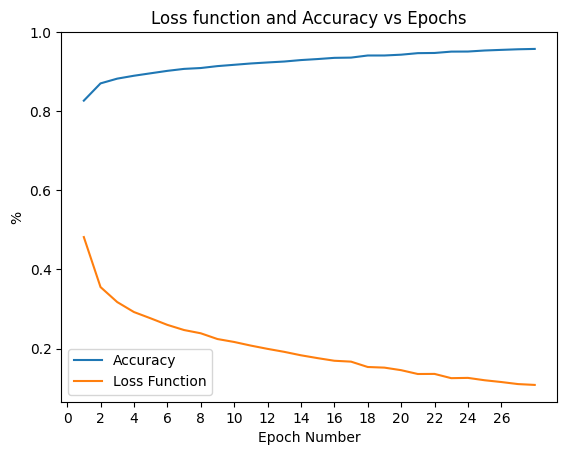

In [ ]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.title('Loss function and Accuracy vs Epochs')
plt.ylabel('%/100')
plt.xlabel('Epoch Number')
plt.legend(['Accuracy', 'Loss Function'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()



## 6. Run inference
Run inference in the test set and compute the metrics for testing.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(y_test_set, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.80      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.94      0.86      0.90      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.66      0.77      0.71      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## 7. Test samples
Show some samples from the test set: image, reference class and predicted class.

313/313 [==============================] - 1s 3ms/step


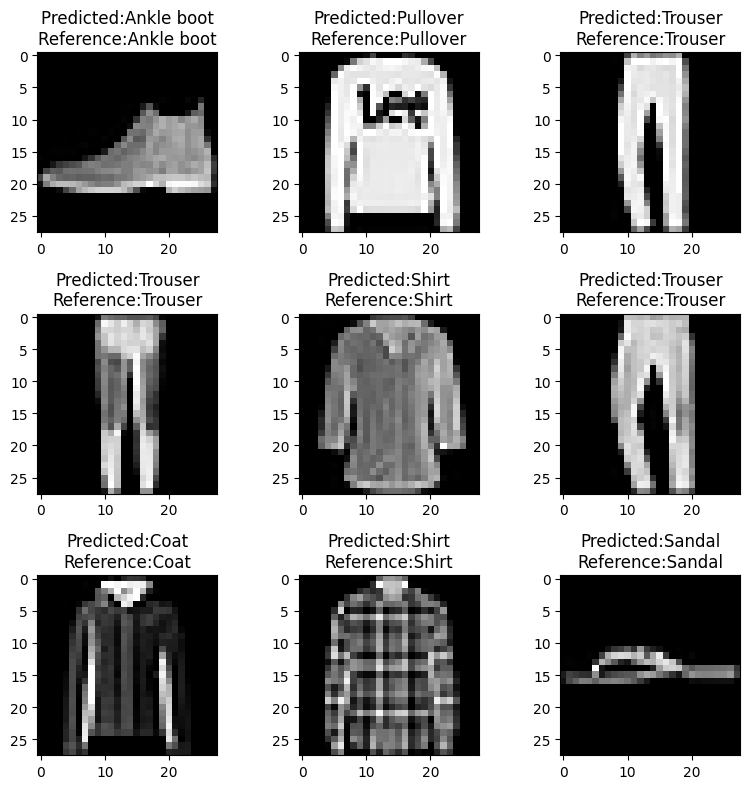

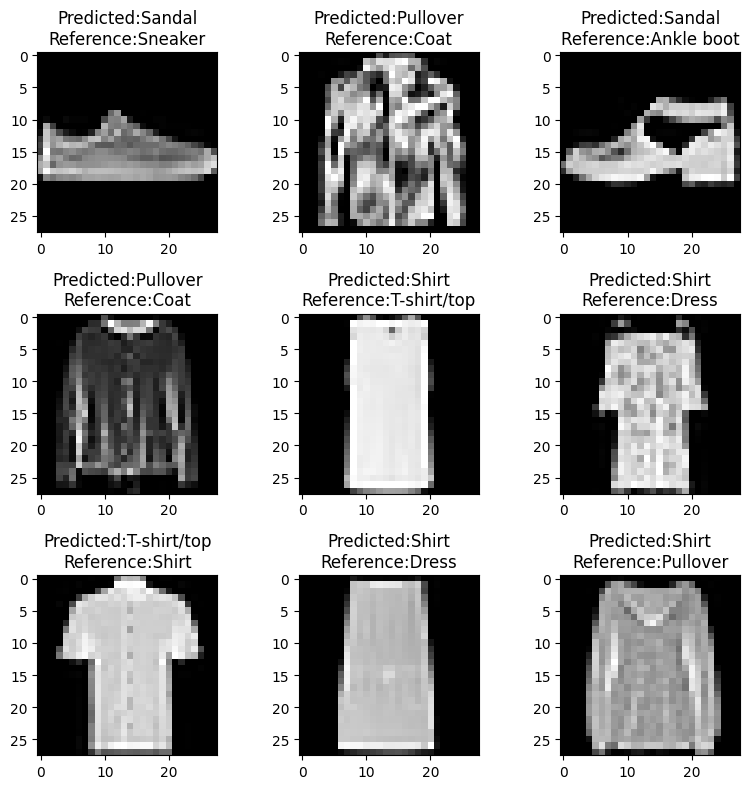

In [ ]:
pred= model.predict(x_test_set)
y_pred = np.argmax(pred, axis=1)
# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test_set)[0]
incorrect_indices = np.nonzero(y_pred != y_test_set)[0]

plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_set[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nReference:{}".format(class_labels_dict[y_pred[correct]], class_labels_dict[y_test_set[correct]]))

plt.tight_layout() 

plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_set[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nReference:{}".format(class_labels_dict[y_pred[incorrect]], class_labels_dict[y_test_set[incorrect]]))
    
plt.tight_layout() 

## 8. Testing with new image
Test the model with another image (from internet or take a photo with your phone). Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$. 

Comment the results.

313/313 [==============================] - 2s 5ms/step - loss: 0.4656 - accuracy: 0.8886


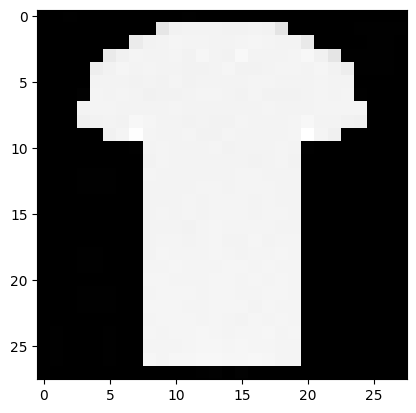

1/1 [==============================] - 0s 32ms/step
[5]


In [ ]:
file = "C:/Users/mcoro/python_projects/t-shirt.jpg"
model.evaluate(x_test_set, Y_test)

from IPython.display import Image
Image("C:/Users/mcoro/python_projects/t-shrit.jpg")

image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = image.reshape(1,784)
image = image.astype('float32')
image = image.astype('float32')/255

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()

pred = model.predict(image)

print(np.argmax(pred, axis=1))
#I chose a t-shirt image from internet to test the model, but the MLP predicted it as an item of class 5 (sandal). 
# The accuracy for generalization of the MLP is not good. 

## 9. How could we improve the trained model?

By using a Convolutional Neural Network, which will reduce the calculation of biases and weights for the hidden layers.